In [10]:
import keras
mnist = keras.datasets.mnist#here i import the mnist, a library with wandwritten images

(x_train, y_train), (x_test, y_test) = mnist.load_data()

5


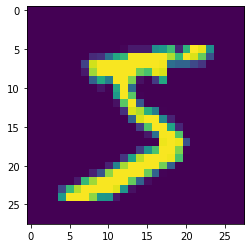

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show

print(y_train[0])

In [12]:
#reshape all the images to save process
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_train/=255
x_test= x_test.astype('float32')
x_test/=255

In [13]:
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, 10)#10 is because theres 10  possible casses(from 0 to 9)
y_test = keras.utils.to_categorical(y_test, 10)

print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
model = keras.models.Sequential()

#kernel_size=the size of the chunks of pixels from the image
#this input_shape is the variable i've set before
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = input_shape))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

#MaxPooling will basically shrunk the image catching the most 'important' pixels
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

In [15]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 148s 314ms/step - loss: 2.2960 - accuracy: 0.1109 - val_loss: 2.2441 - val_accuracy: 0.3672
Epoch 2/20
469/469 [==============================] - 142s 303ms/step - loss: 2.2367 - accuracy: 0.2388 - val_loss: 2.1677 - val_accuracy: 0.5638
Epoch 3/20
469/469 [==============================] - 142s 303ms/step - loss: 2.1630 - accuracy: 0.3626 - val_loss: 2.0604 - val_accuracy: 0.6489
Epoch 4/20
469/469 [==============================] - 143s 304ms/step - loss: 2.0593 - accuracy: 0.4544 - val_loss: 1.9136 - val_accuracy: 0.6914
Epoch 5/20
469/469 [==============================] - 147s 314ms/step - loss: 1.9140 - accuracy: 0.5223 - val_loss: 1.7240 - val_accuracy: 0.7232
Epoch 6/20
469/469 [==============================] - 143s 305ms/step - loss: 1.7445 - accuracy: 0.5639 - val_loss: 1.5060 - val_accuracy: 0.7500
Epoch 7/20
469/469 [==============================] - 142s 303ms/step - loss: 1.5568 - accuracy: 0.6015 - val_loss: 1.2891 -

In [16]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 6s 20ms/step - loss: 0.4587 - accuracy: 0.8806
[0.45868897438049316, 0.8805999755859375]
